# Lecture 6: Linear Regression, Validation, and Fitting
## 10/16/18

### Table Of Contents
* [Linear Regression](#section1)
    * [Introduction](#section1_1)
    * [Why Make A Model?](#section1_2)
    * [Simple Linear Regression](#section1_4)
        * [Loss and the Line of Best Fit](#section1_4_1)
        * [Ordinary Least Squares](#section1_4_2)
        * [Categorical Variables](#categorical)
        * [Making the Model](#making_model)
        * [Try It Yourself!](#try_it)
        * [Interpreting the Model](#interpreting_model)
        * [Assessing the Model](#assessment)
            * [Coefficient of Determination ($R^2$)](#r_squared)
            * [Residual Plots](#residual_plots)
    * [When Can I Use A Linear Model?](#when_to_use)
    * [Multiple Linear Regression](#section1_5)
* [Fitting](#section2)
    * [Underfitting](#section2_1)
    * [Overfitting](#section2_2)
* [Validation](#section3)



### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Originally authored by [Calvin Chen](mailto:chencalvin99@berkeley.edu) and [Rosa Choe](mailto:rosachoe@berkeley.edu).



In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [42]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

<a id='section1'></a>
# Linear Regression

<a id='section1_1'></a>
## Introduction

Let's say there's a room of people and you want to guess their heights. You don't know anything about them, so what would your best guess be for each person?

What if you're now given the heights of each person in the room; do you think you could make a better estimate for their weights now?

<a id='section1_2'></a>
## Why Make A Model?

As you saw in the example above, a big reason for making a model is to make predictions. We use existing data to make a **model** that will help us predict the values of future events or observations given the value of the predictive variable. A **model** is just a simplified representation of reality. In the case above, we could make a model to predict weights based on heights, and whatever model we make would be a simplification of the true relationship between weight and height.

Another reason for making a model is to describe the relationship between variables. Let's say you want to show that there's a relationship between two variables, say, smoking and incidence of cancer. Showing *what* the relationship is would strengthen your argument that there is one.

That's not to say that just because you can make a model describing a relationship between two variables, one necessarily causes the other! All we're trying to do here is show that there is *a* relationship (or correlation) between variables, not that there is a _causal_ relationship.

<a id='section1_4'></a>
## Simple Linear Regression

One of the simplest models is a **simple linear regression model**. As the name suggests, it models the relationship as a *line*. You may be familiar with the slope-intercept form of a line, and that's exactly how the linear model looks!

$$y = mx+b$$

Here, $y$ is the variable we're trying to predict, and $x$ is an explanatory variable used to predict $y$. In the case of our weight and height example, $y$ would represent weight, while $x$ represents height. Using known $x$'s, we want to accurately predict $y$ using the right $m$ and $b$.


<a id='section1_4_1'></a>
### Loss and the Line of Best Fit
How do we figure out what $m$ and $b$ are? We do this by defining a *loss function*. The **loss function** is a function that measures how far off our model's estimated values are from the true values. We want our model to be as accurate as possible, so that means we want to minimize the error our model makes in predicting values. In other words, we want to minimize the loss. Another name for the line that minimizes the error is the **line of best fit**. It's a pretty descriptive name, since it's the line that fits our data the best. The *loss function* helps us define what is *best fit*. 

<a id='section1_4_2'></a>
### Ordinary Least Squares
In the case of linear regression, we generally use the method of **ordinary least squares (OLS)**, which minimizes the sum of squared residuals. A **residual** is the difference between the predicted value and the observed value for a given $x$. For a given observation $(x_i, y_i)$, the residual $e_i$ is calculated as:

$$ \underbrace{e_{i}}_{error} = \underbrace{y_i}_{actual} - \underbrace{\hat{y_i}}_{predicted} = y_i - \beta_0 - \beta_1x_i$$

**Question**: Can you think of why we would want to *square* the residuals and sum them instead of just minimizing their sum?


Since we want to minimize the **residual sum of squares (RSS)**, what we're actually going to minimize is this:

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - \beta_0 - \beta_1x_i)^2$$

By minimizing this function, we can solve for slope $m$ and the intercept $b$. The actual calculations for deriving the formulas that define these coefficients requires a bit of calculus, so we'll skip that part for now, but if you want to look into it more on your own you can check out [this link](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)! For now, we'll just tell you that $m$ and $b$ can be solved as:

$$\begin{aligned}
\hat{b}&=\bar {y}-\hat{m}\,{\bar{x}},\\
\hat{m}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}$$

This is pretty complicated! Luckily, you don't need to know any of this to make a linear model, but this is here for reference if you're interested in the math behind what we'll be getting into today. 

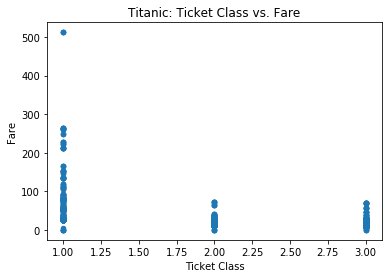

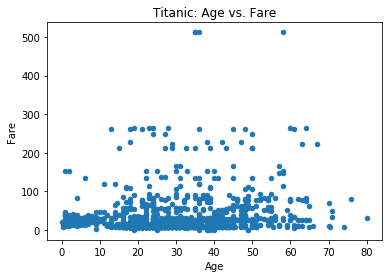

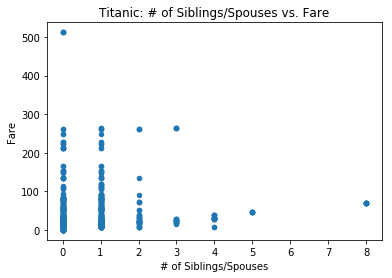

In [43]:
titanic_df.plot.scatter("pclass", "fare")
plt.title("Titanic: Ticket Class vs. Fare")
plt.xlabel("Ticket Class")
plt.ylabel("Fare")

titanic_df.plot.scatter("age", "fare")
plt.title("Titanic: Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

titanic_df.plot.scatter("sibsp", "fare")
plt.title("Titanic: # of Siblings/Spouses vs. Fare")
plt.xlabel("# of Siblings/Spouses")
plt.ylabel("Fare");

<a id='categorical'></a>
### Categorical Variables

Unfortunately, the `titanic` dataset you're familiar with isn't the best suited for linear regression. If you look at the scatterplots of the numeric data, they aren't really that informative or suggestive of much of a linear relationship between the variables. Linear regression is great for numerical data, but not as good for *categorical* data. A lot of the variables in the dataset are **categorical**, including the `pclass` and `sibsp` variables, but those are at least **ordinal**, while variables like `sex` and `cabin` are **nominal**. 

- **categorical**: a varaible that has discrete values that represent *categories*
    - **ordinal**: a categorical variable whose categories have a clear *ordering*, so the categories have numerical meaning
    - **nominal**: a categorial variable whose categories exist by *name* only, with no inherent numerical value or ordering
    
We'll talk more about categorical variables in a future lecture, and how we can use them in our linear models, but for now, let's try to find a better dataset to work with.

<a id='making_model'></a>
### Making the Model

In [62]:
mpg = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'] # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, random_state = 0) # split into training set and test set
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corona,31.0,4,76.0,52,1649,16.5,74,3
datsun b210 gx,39.4,4,85.0,70,2070,18.6,78,3
mercury marquis brougham,12.0,8,429.0,198,4952,11.5,73,1
volkswagen dasher,25.0,4,90.0,71,2223,16.5,75,2
audi 100 ls,24.0,4,107.0,90,2430,14.5,70,2


Here we've chosen the `mpg` dataset, which tells us various attributes of different cars, including a car's make and model, miles per gallon, number of cylinders, weight, and more! We're going to be trying to see which features affect a car's `mpg`, and our goal is to create a model that accurately predicts `mpg` given other attributes of the car. 

You'll notice that we separated the `mpg` data into two separate dataframes, `mpg_train` and `mpg_test`. We'll get into why in a later part of today's lecture, but for now, make sure to do all of your analysis and model creation on the `mpg_train` dataset! 

Take a look at some of the other features in the dataset, and see which variables produce interesting scatterplots by replacing `"displacement"` in the cell below!

<IPython.core.display.Javascript object>


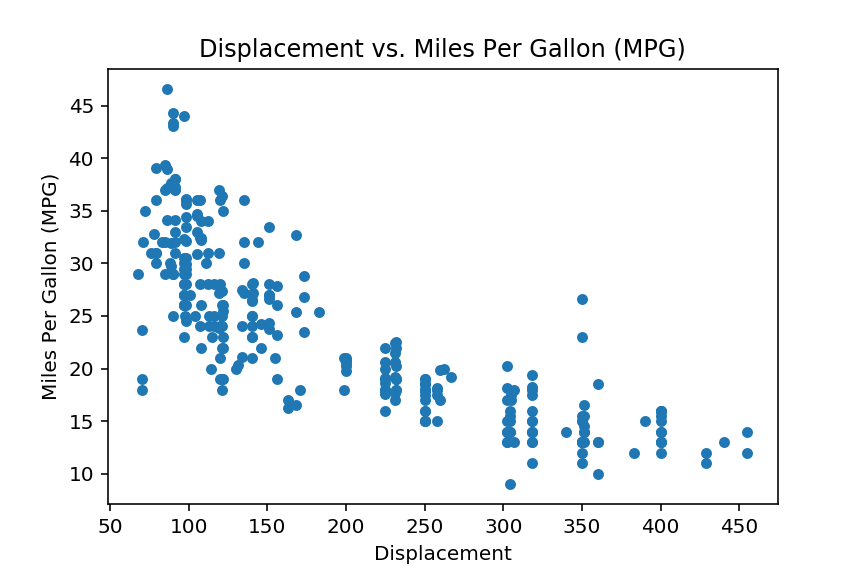

In [63]:
mpg_train.plot.scatter("displacement", "mpg") # try different values instead of "displacement" here

plt.title("Displacement vs. Miles Per Gallon (MPG)")
plt.xlabel("Displacement")
plt.ylabel("Miles Per Gallon (MPG)");

Below we've defined a helper function `get_features()` that takes a dataframe, a list of column names that you want to use as predictor variables (features) and the column name of the variable you're predicting. You can take a look at the documentation for the function as well as the function body if you want to take a deeper look into what the function is doing, but basically we're selecting the relevant columns, removing missing rows, and transforming the columns into a form that the `LinearRegression.fit()` function expects.

In [46]:
from sklearn.linear_model import LinearRegression

def get_features(data, col_list, y_name):
    """
    Function to return a numpy matrix of pandas dataframe features, given k column names and a single y column
    Outputs X, a n X k dimensional numpy matrix, and Y, an n X 1 dimensional numpy matrix.
    This is not a smart function - although it does drop rows with NA values. It might break. 
    
    data(DataFrame): e.g. mpg, mpg_train
    col_list(list): list of columns to extract data from
    y_name(string): name of the column you to treat as the y column
    
    Ideally returns one np.array of shape (len(data), len(col_list)), and one of shape (len(data), len(col_list))
    """
    
    # keep track of numpy values
    feature_matrix = data[col_list + [y_name]].dropna().values
    return feature_matrix[:, :-1], feature_matrix[:, -1]

<a id='try_it'></a>
#### Try It Yourself!
Using the `get_features()` function and the `feature_cols` array, choose a variable of your choosing (other than `mpg`) and try to fit a linear model in the cell below.

In [47]:
# Initialize our linear regression model
linear_model = LinearRegression()

# X is a matrix of inputs, Y is the variable we are trying to learn
feature_cols = ['displacement']
X, Y = get_features(mpg_train, feature_cols, 'mpg')

# Fit the model to the data
linear_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Wow, that was anticlimactic! It seems like nothing happened. However, behind the scenes, our `linear_model` variable has now been fit to the data we passed into the `fit()` function! We can see what the `slope` and `intercept` are by looking into the `coef_` and `intercept_` attributes of our `linear_model`.

In [48]:
linear_model.coef_, linear_model.intercept_

(array([-0.06158552]), 35.31536791852335)

You might notice that, while the `intercept_` is a single scalar value, `coef_` returns an array. This is because you can choose to fit your model to multiple explanatory variables (hence the list form of `feature_cols`). When you define multiple explanatory variables, the `coef_` will contain a separate coefficient for each explanatory variable you chose! You'll be able to explore that in a bit, but for now let's take a look at what our linear model looks like relative to our original data.

We've defined a helper function for you that takes the `linear_model` you've created, as well as a string representing the column you chose to make your model on, and plots your linear model against the training data. Let's try to see how well our line fits the data! 

In [49]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    slope = linear_model.coef_[0]
    intercept = linear_model.intercept_
    data.plot.scatter(x_name, y_name)
    x = np.arange(max(data[x_name]))
    y = intercept + slope*x
    plt.plot(x, y, color='red')
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

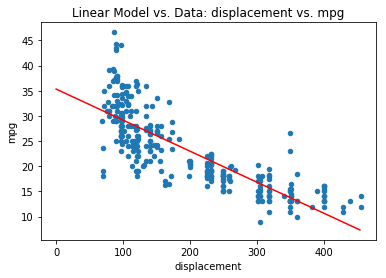

In [50]:
intercept = linear_model.coef_[0]
slope = linear_model.intercept_

overlay_simple_linear_model(mpg_train, "displacement", "mpg", linear_model)

<a id='interpreting_model'></a>
### Interpreting the Model

You're probably thinking "COOL! This looks like a pretty good representation of the data! But what do these coefficients even mean?" That is a great question! As you might have guessed, the `intercept` term is where our line intersects with the y-axis, or when our predictor variable has a value of 0. In relation to our model, it's our prediction for `mpg` given a predictor variable value of 0. The `slope` term is a little more complicated. Yes, it is the slope of the line, but how do we interpret it in the relationship between `mpg` and our explanator?

**Answer:** For each unit of increase in `displacement`, we predict a $-.06$ change in `mpg`. 

<a id='assessment'></a>
### Assessing the Model
<a id='r_squared'></a>
#### Coefficient of Determination ($R^2$)
Another question you might have is, how do we know how good our model is? One way of measuring how well your model fits the data is the $R^2$ coefficient, or the **coefficient of determination**. $R^2$ is defined as $1-\frac{RSS}{TSS}$, where RSS is the same as the loss we defined earlier, the **residual sum of squares** and $TSS =\sum _{i}(y_{i}-{\bar {y}})^{2}$, known as the **total sum of squares**, with $\bar{y}$ representing the mean of the sample $y$ values. One way of thinking about the TSS is that it's the loss if you always guessed the mean. Once again, we leave the math here to pique your interest, but understanding it is not required of this workshop. Basically, what the $R^2$ represents is the proportion of variation in the dependent or response variable that is explained by the explanatory variable(s).

We can obtain our model's $R^2$ value by using our `linear_model`'s `score()` function, like so:

In [51]:
linear_model.score(X, Y)

0.6612547211598864

Woohoo! If you used `displacement`, our model accurately predicts 66.1% of the variation in `mpg`. Is this good? Since $R^2$ is a proportion, it's value is always between $0$ and $1$. An $R^2$ value of $0$ would mean that none of the variation of $y$ is explained by $x$, and our model is trash! An $R^2$ value of $1$ means that our model perfectly fits our data! So, the closer our $R^2$ value is to $1$, the better it fits our data.

In the cell below, see if using a different explanatory variable increases your $R^2$. Make sure to stick with one explanatory variable for now!

**Question:** Can you think of a possible feature you could use to make our model have an $R^2$ value of $1$?

In [52]:
linear_model2 = LinearRegression()
feature_cols2 = ["displacement"]

X2, Y2 = get_features(mpg_train, feature_cols2, 'mpg')

linear_model2.fit(X2, Y2)

linear_model2.score(X2, Y2)

0.6612547211598864

<a id='residual_plots'></a>
#### Residual Plots
Another way of analyzing your model is through *residual plots*. A **residual plot** is kind of what you'd think – it plots your residuals against the corresponding $x$ values. If you see interesting patterns in your residual plot, it's indicative of some *bias* in your model – your error isn't due to randomness in the data but because of an underlying problem in the way you've defined the relationship between your variables. Let's take a look at the residual plot below as an example.

In [75]:
def plot_residuals(data, x_name, y_name, linear_model):
    """
    This function plots a residual plot based off of a simple linear model 
    on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs residual plot resulting from linear model overlaid on scatterplot
    """
    X, Y = get_features(data, [x_name], y_name)
    plt.scatter(X, linear_model.predict(X) - Y)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.show()

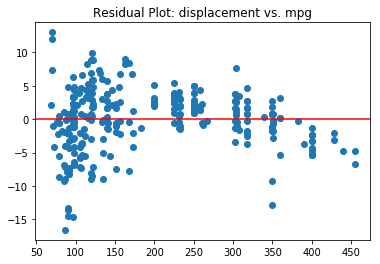

In [76]:
plot_residuals(mpg_train, 'displacement', 'mpg', linear_model)

As you can see, the residuals aren't scattered randomly around the y-axis. The points are more spread out vertically for smaller values of `displacement` and less scattered vertically for larger values. Furthermore, in the middle the residuals are mostly above the line, while on the left and right side, the residuals tend to be below the line. Such a pattern as this one suggests that our model isn't that great at describing the relationship between `displacement` and `mpg`, and there's some fundamental issue with the assumption that the relationship can be modeled by a simple linear relationship. [Here](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)'s some more information about how to interpret different patterns in residual plots and how you can change your model to fix these errors.

<a id='when_to_use'></a>
### When Can I Use a Linear Model?
Let's talk about some of the assumptions of linear regression, so you know when it's appropriate to use one. 
- There's a linear relationship between the response variable and the explanatory variables.
- There's no pattern in the residual plot.

Now that you're a master of simple linear regression, you're probably thinking "Rosa/Calvin, WHY CAN'T I USE MORE EXPLANATORY VARIABLES? What if I think `mpg` depends on two of the variables? Wouldn't that make my model better?" Why, Ms/Mr. Genius Statistician, you *can* use more explanatory variables! That leads us to *multiple linear regression*.

<a id='section1_5'></a>
## Multiple Linear Regression

**Multiple linear regression** is an extension to the simple linear regression model with multiple explanatory variables instead of just one.

With two explanatory variables, we can still visualize the model in a three-dimensional graph, but as we add more and more variables it's pretty much impossible to plot it (can you imagine what a 5D graph would look like?). 

Below is a code chunk that plots the scatterplots of `weight` and `displacement` against `mpg`, as well as the corresponding linear model. It's interactive, so you can drag it around to get a better look at how the model fits the data!

You'll notice that the model is no longer a line – it's a plane. This is the 3D analog to a line. Just as a line defines one value for $y$ for any given $x$, a plane defines one value for $z$ for any pair of $(x, y)$.

<IPython.core.display.Javascript object>


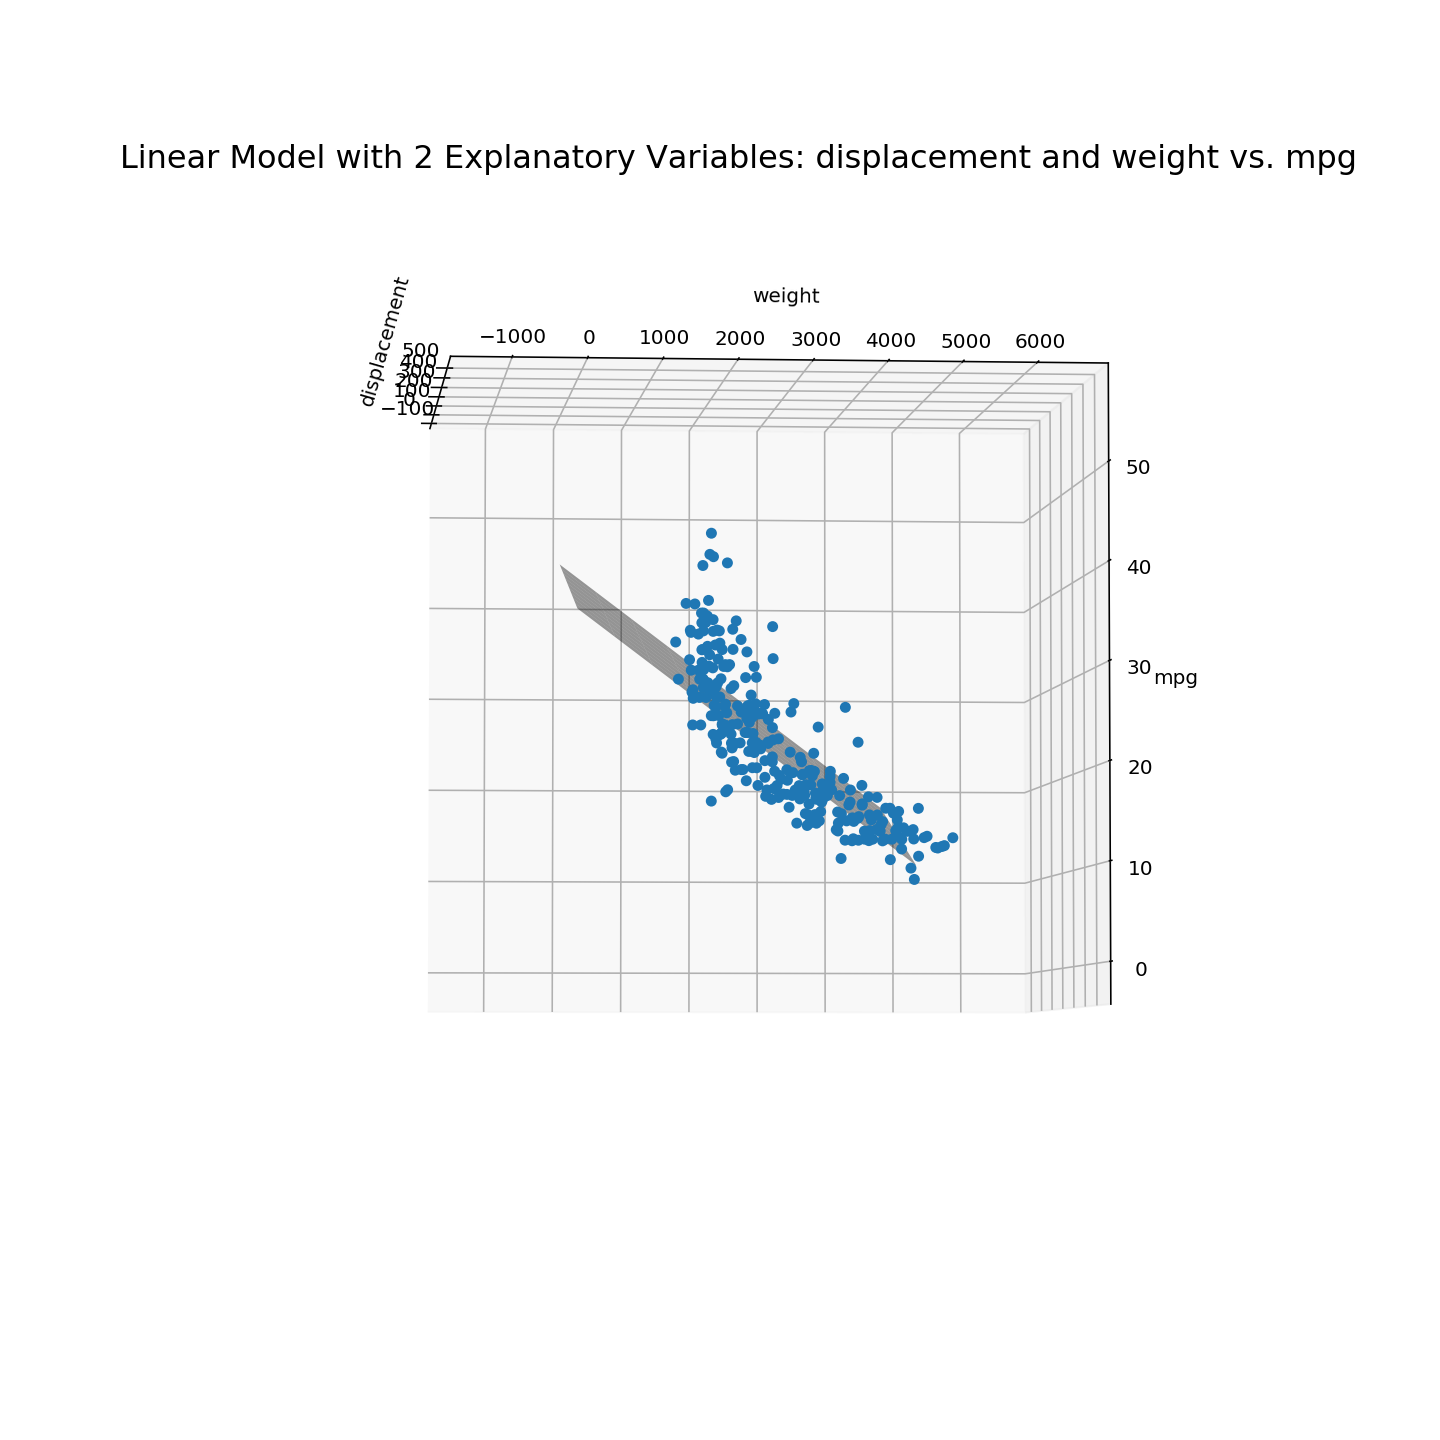

In [61]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook

def plot_multiple_linear_regression(data, x_1_name, x_2_name, y_name):
    """
    This function makes a 3D plot for multliple linear regression with two explanatory variables.
    Thanks to: https://stackoverflow.com/a/26434204
    
    data(DataFrame): e.g. mpg, mpg_train
    x_1_name(string): the name of the column representing the first explanatory variable
    x_2_name(string): the name of the column representing the second explanatory variable
    y_name(string): the name of the column representing the dependent/response variable
    
    returns None but outputs an interactive 3D plot
    """
    model = LinearRegression()
    X, Y = get_features(data, [x_1_name, x_2_name], y_name)
    fit = model.fit(X, Y)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    x_surf = np.arange(0, max(data[x_1_name]), max(data[x_1_name])/10)                # generate a mesh
    y_surf = np.arange(0, max(data[x_2_name]), max(data[x_2_name])/10)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)

    exog = pd.core.frame.DataFrame({x_1_name: x_surf.ravel(), x_2_name: y_surf.ravel()})
    out = fit.predict(exog)
    ax.plot_surface(x_surf, y_surf,
                    out.reshape(x_surf.shape),
                    rstride=1,
                    cstride=1,
                    color='None',
                    alpha = 0.4)

    ax.scatter(data[x_1_name], data[x_2_name], data[y_name],
               marker='o',
               alpha=1)

    ax.set_xlabel(x_1_name)
    ax.set_ylabel(x_2_name)
    ax.set_zlabel(y_name)
    plt.title("Linear Model with 2 Explanatory Variables: " + x_1_name + " and " + x_2_name + " vs. " + y_name, y=1.08, fontsize=16)

    plt.show()
    
plot_multiple_linear_regression(mpg_train, "displacement", "weight", "mpg")

Let's see how well this model does, using the same metric as before, $R^2$.

In [16]:
multiple_model = LinearRegression()
X3, Y3 = get_features(mpg_train, ["displacement", "weight"], "mpg")
multiple_model.fit(X3, Y3)

print("Multiple Linear Regression R^2:", multiple_model.score(X3, Y3))

Multiple Linear Regression R^2: 0.7111500651342424


Lookin' good! Let's compare this $R^2$ value with the $R^2$ of the simple linear models.

In [17]:
dispX, Y = get_features(mpg_train, ["displacement"], "mpg")
wtX, Y = get_features(mpg_train, ["weight"], "mpg")

linear_model.fit(dispX, Y)
print("Simple Linear Regression (displacement) R^2:", linear_model.score(dispX, Y))

linear_model.fit(wtX, Y)
print("Simple Linear Regression (weight) R^2:", linear_model.score(wtX, Y))

Simple Linear Regression (displacement) R^2: 0.6612547211598864
Simple Linear Regression (weight) R^2: 0.7033298558287258


What do you notice about the $R^2$ values of the simple linear regression models and the multiple case?

If you noticed the equation for $R^2$, you'll notice that for a given dataset, it is completely determined by the $SS_{res}$ term, since the total variability is constant across all models. In our method of ordinary least squares regression, we minimize the $SS_{res}$, which maximizes our $R^2$. Adding more variables will only increase our $R^2$ value; making our model more complex will never increase the amount of error in our residuals and will always make our model align more closely to the sample data.  This means that $R^2$ will always make complex models seem 'better', but as we will see later, that is not always the case.

In [64]:
%matplotlib inline

### What is Linear Regression Good For?

One of the advantages of linear regression is that the models are fairly simple and can be easy to interpret, as we illustrated earlier today. However, in some cases a linear model might be *too* simple to properly represent the relationship between the variables you've chosen, even when you've transformed your variables.
